Set-up

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [3]:
os.getcwd()
#working directory should be /Code/CodeFigure2

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure2'

Plotting the number of pHH3+, Fas3+ Cells in 1 vs 6 week w1118(x)

Note: You will need to run the StatspHH3w1118.Rmd file first, or annotate out the stats code

In [4]:
csv_path = "../../Data/DataFigure2/w1118gH2Av_n.csv"
df = pd.read_csv(csv_path)

In [5]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

In [6]:
df.head(7)

,Weeks,gH2Av,n,N
0,1 Week,1.1250,8,1
1,1 Week,1.1818,11,2
2,1 Week,1.1880,16,3
3,6 Weeks,3.1500,20,1
4,6 Weeks,2.8890,9,2
5,6 Weeks,4.1000,10,3


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_36408/3521981256.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


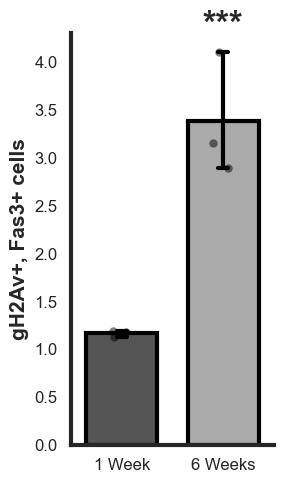

In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stats_path = "../../Results/ResultsFigure2/StatsgH2AvPoisson.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)

fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

sns.barplot(
    data=df,
    x="Weeks",
    y="gH2Av",
    order=label_order,
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

sns.stripplot(
    data=df,
    x="Weeks",
    y="gH2Av",
    order=label_order,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    ax=ax
)

y_max = df.groupby("WeekNum")["gH2Av"].max()
offset = 0.1

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)


plt.ylim(0, 4.3)
plt.ylabel("gH2Av+, Fas3+ cells", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure2', 'gH2Avw1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()